In [4]:
suppressPackageStartupMessages(library(tidyverse))

In [5]:
phi <- (1+sqrt(5))/2
num <- seq(0,-10,l = 10000)
fib <- (phi^num-((-1+0i)/phi)^num)/sqrt(5)
real <- Re(fib)
imag <- Im(fib)

In [6]:
n <- 11
f <- numeric(n)
f[1] <- 0
f[2] <- 1
if(any(num < 0)){
  for(i in 3:n){
    f[i] <- f[i-1]+f[i-2]
  }
  for(i in 1:length(f)){
    f[i] <- f[i]*(-1)^i
  }
}else{
  for(i in 3:n){
    f[i] <- f[i-1]+f[i-2]
  }
}

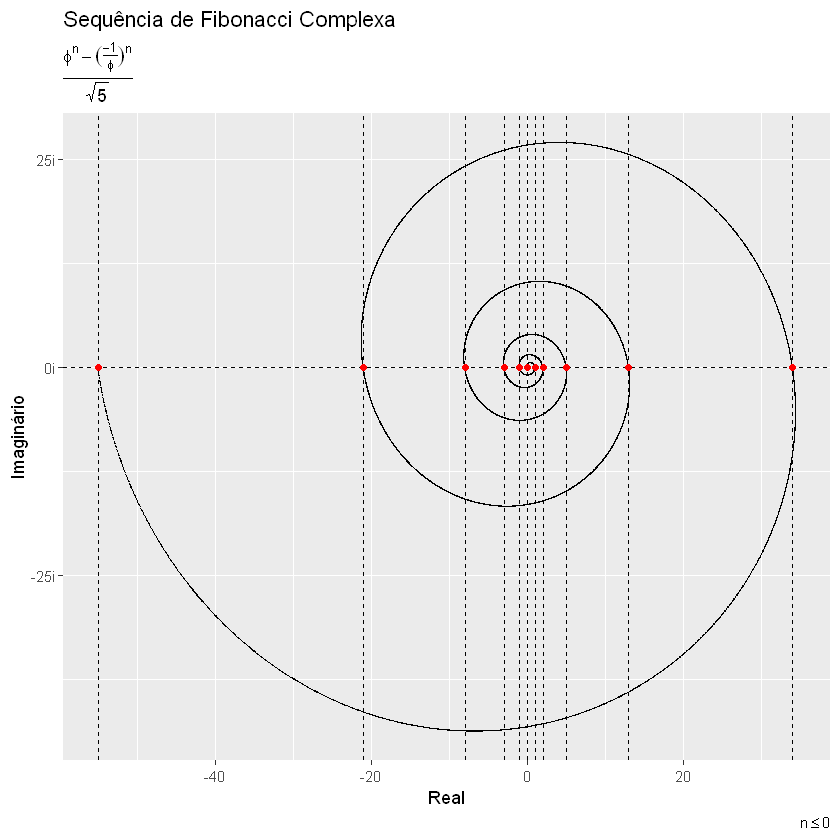

In [7]:
data <- data.frame(Imag = imag, Real = real)
expressao <- expression(frac(phi^n-(frac(-1,phi))^n,sqrt(5)))
if(any(num < 0)){
  expre1 <- expression(n <= 0)
}else{
  expre1 <- expression(n >= 0)
}
fibo <- data.frame(f, z = 0)
ggplot()+
  geom_point(aes(x = Real, y = Imag),pch = ".", data = data)+
  geom_hline(yintercept = 0, lty = 2)+
  geom_vline(xintercept = f, lty = 2)+
  geom_point(aes(x = f, y = z), col = "red", data = fibo)+
  xlim(min(real), max(real))+
  labs(x = "Real", y = "Imaginário", caption = expre1)+
  ggtitle("Sequência de Fibonacci Complexa", subtitle = expressao)+
  scale_y_continuous(labels = scales::number_format(suffix = "i"),
                     limits = c(min(imag), max(imag)))